In [1]:
import cv2
import numpy as np
import lib.jpeg as jpg
import lib.evaluate as eval
import lib.utils as utl
import matplotlib.pyplot as plt

### JPEG CODEC WORKFLOW:

<img src="presentation/jpeg_flow.jpg" alt="Kitten"
	title="A cute kitten" width="80%" />

### LOADING A IMAGE

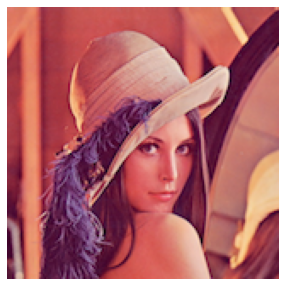

In [2]:
#usage example
ori_img = utl.open_image("../samples/lena.bmp")

plt.figure(figsize=(5,5))
plt.axis('off')
plt.imshow(utl.cvt_bgr2rgb(ori_img))

### Encoding

DCT Blocks: Q100 - Q50 - Q25 - Q10


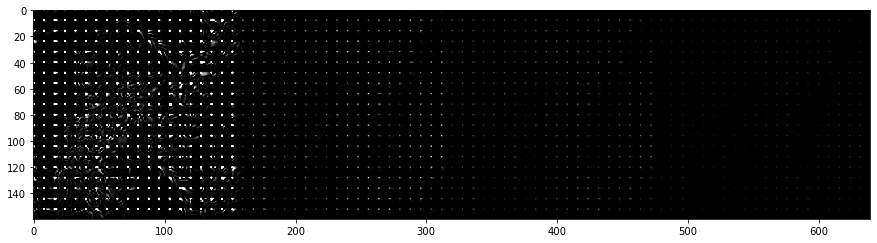

In [3]:
#creating qtables for luma and chroma for qualities 100, 50, 25 and 10
qtable_luma_100, qtable_chroma_100 = jpg.generate_qtables(quality_factor=100)
qtable_luma_50, qtable_chroma_50 = jpg.generate_qtables(quality_factor=50)
qtable_luma_25, qtable_chroma_25 = jpg.generate_qtables(quality_factor=25)
qtable_luma_10, qtable_chroma_10 = jpg.generate_qtables(quality_factor=10)
qtable_luma_5, qtable_chroma_5 = jpg.generate_qtables(quality_factor=5)

#encoding 
dct_img_100 = jpg.encode_image(ori_img, qtable_luma_100, qtable_chroma_100)
dct_img_50 = jpg.encode_image(ori_img, qtable_luma_50, qtable_chroma_50)
dct_img_25 = jpg.encode_image(ori_img, qtable_luma_25, qtable_chroma_25)
dct_img_10 = jpg.encode_image(ori_img, qtable_luma_10, qtable_chroma_10)
dct_img_5 = jpg.encode_image(ori_img, qtable_luma_5, qtable_chroma_5)

print("DCT Blocks: Q100 - Q50 - Q25 - Q10")
plt.figure(figsize=(15,15))
plt.imshow(np.hstack([dct_img_100[:,:,0],dct_img_50[:,:,0], dct_img_25[:,:,0],dct_img_10[:,:,0]]),vmin=0, vmax=np.amax(dct_img_50), cmap="gray")

### Decoding

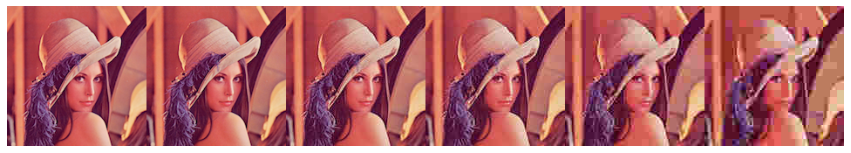

In [4]:
#decoding
dec_img_100 = jpg.decode_image(dct_img_100, qtable_luma_100, qtable_chroma_100)
dec_img_50 = jpg.decode_image(dct_img_50, qtable_luma_50, qtable_chroma_50)
dec_img_25 = jpg.decode_image(dct_img_25, qtable_luma_25, qtable_chroma_25)
dec_img_10 = jpg.decode_image(dct_img_10, qtable_luma_10, qtable_chroma_10)
dec_img_5 = jpg.decode_image(dct_img_5, qtable_luma_5, qtable_chroma_5)

plt.figure(figsize=(15,15))
plt.axis('off')
plt.imshow(np.hstack([utl.cvt_bgr2rgb(ori_img), utl.cvt_bgr2rgb(dec_img_100), utl.cvt_bgr2rgb(dec_img_50), 
                      utl.cvt_bgr2rgb(dec_img_25), utl.cvt_bgr2rgb(dec_img_10), utl.cvt_bgr2rgb(dec_img_5)]))

### Evaluating

In [5]:
print("100 - NRMSE:", eval.calc_nrmse(ori_img, dec_img_100), 
"SSIM:", eval.calc_ssim(ori_img, dec_img_100),
"PSNR:", eval.calc_psnr(ori_img, dec_img_100))

print("50 - NRMSE:", eval.calc_nrmse(ori_img, dec_img_50), 
"SSIM:", eval.calc_ssim(ori_img, dec_img_50),
"PSNR:", eval.calc_psnr(ori_img, dec_img_50))

print("25 - NRMSE:", eval.calc_nrmse(ori_img, dec_img_25), 
"SSIM:", eval.calc_ssim(ori_img, dec_img_25),
"PSNR:", eval.calc_psnr(ori_img, dec_img_25))

print("10 - NRMSE:", eval.calc_nrmse(ori_img, dec_img_10), 
"SSIM:", eval.calc_ssim(ori_img, dec_img_10),
"PSNR:", eval.calc_psnr(ori_img, dec_img_10))

print("5 - NRMSE:", eval.calc_nrmse(ori_img, dec_img_5), 
"SSIM:", eval.calc_ssim(ori_img, dec_img_5),
"PSNR:", eval.calc_psnr(ori_img, dec_img_5))

100 - NRMSE: 0.011352656089131365 SSIM: 0.9951750127916265 PSNR: 44.50541930010612
50 - NRMSE: 0.05848270095508528 SSIM: 0.8986575696344729 PSNR: 30.266820499897925
25 - NRMSE: 0.07551415568691036 SSIM: 0.8438918393963707 PSNR: 28.04680151634313
10 - NRMSE: 0.10655737175013115 SSIM: 0.7404320301883871 PSNR: 25.055698935106534
5 - NRMSE: 0.14876322029823907 SSIM: 0.6376014652903264 PSNR: 22.157457515361195


C:\Users\Busson_Windows\OneDrive\Documentos\git\Deep-JPEG-Decoder\src\lib\evaluate.py:5: UserWarning: DEPRECATED: skimage.measure.compare_nrmse has been moved to skimage.metrics.normalized_root_mse. It will be removed from skimage.measure in version 0.18.
  return compare_nrmse(img_ref, img_test)
C:\Users\Busson_Windows\OneDrive\Documentos\git\Deep-JPEG-Decoder\src\lib\evaluate.py:8: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  return compare_ssim(img_ref, img_test, multichannel=True)
C:\Users\Busson_Windows\OneDrive\Documentos\git\Deep-JPEG-Decoder\src\lib\evaluate.py:11: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
  return compare_psnr(img_ref, img_test, data_range=255)


### Luma channel test

CHANNEL TEST - NRMSE: 1.3799532816284903 SSIM: 0.0016599775444304384 PSNR: 2.8100812639289745
ORIGINAL IMAGE - JPEG Q10 - LUMA FROM ORI AND CHROMA FROM Q10


c:\users\busson_windows\appdata\local\programs\python\python37\lib\site-packages\skimage\metrics\_structural_similarity.py:108: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  im2[..., ch], **args)


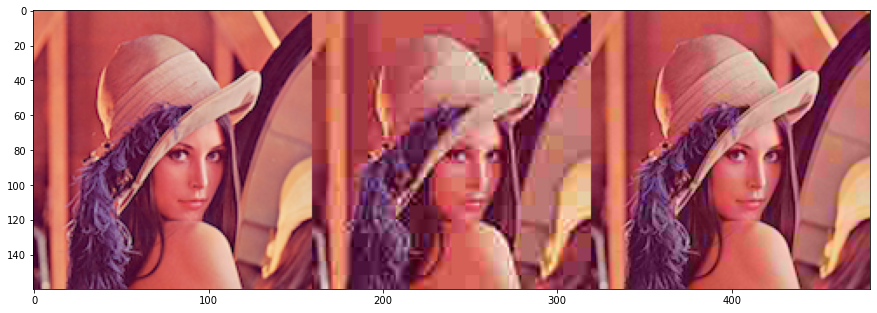

In [6]:
dct_img_test = jpg.encode_image(ori_img, qtable_luma_100, qtable_chroma_10)
dec_img_test = jpg.decode_image(dct_img_test, qtable_luma_100, qtable_chroma_10)

print("CHANNEL TEST - NRMSE:", eval.calc_nrmse(ori_img, dct_img_test), 
"SSIM:", eval.calc_ssim(ori_img, dct_img_test),
"PSNR:", eval.calc_psnr(ori_img, dct_img_test))

print("ORIGINAL IMAGE - JPEG Q10 - LUMA FROM ORI AND CHROMA FROM Q10")
plt.figure(figsize=(15,15))
plt.imshow(np.hstack([utl.cvt_bgr2rgb(ori_img), utl.cvt_bgr2rgb(dec_img_10), utl.cvt_bgr2rgb(dec_img_test)]))